In [39]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, GlobalAveragePooling2D, AveragePooling2D
from keras.models import Sequential, Model
from keras.models import load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import collections
%matplotlib inline

## Loading Pre-trained network

I will be using ResNet50 as starting point to get a decent accuracy

In [2]:
HEIGHT = 300
WIDTH = 300

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

Instructions for updating:
Colocations handled automatically by placer.


/home/sarvagya/anaconda3/envs/tf_2/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
root = '/media/sarvagya/Datasets/food-101/food-101/'
root_train = '/media/sarvagya/Datasets/food-101/food-101/train/'
root_test = '/media/sarvagya/Datasets/food-101/food-101/test/'
root_meta = '/media/sarvagya/Datasets/food-101/food-101/meta/'

In [4]:
# Sort the list in alphabetical order

dirs = sorted(os.listdir(root_train))

In [5]:
dirs

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Creating training dataset

In [6]:
category = []
train_file = open(root_meta+'train.txt')
train_data = train_file.read()
train_data = train_data.split('\n')
train_data.pop()
for i in range(len(train_data)):
    
    food_name = train_data[i].split('/')[0]
    image_name = train_data[i].split('/')[1]
    data = dirs.index(food_name)
    category.append(data)
    train_data[i] = food_name+'/'+image_name+'.jpg'

In [7]:
print(len(category))
print(len(train_data))

75750
75750


## Creating testing dataset

In [8]:
category_test = []
test_file = open(root_meta+'test.txt')
test_data = test_file.read()
test_data = test_data.split('\n')
test_data.pop()
for i in range(len(test_data)):
    
    food_name = test_data[i].split('/')[0]
    image_name = test_data[i].split('/')[1]
    data = dirs.index(food_name)
    category_test.append(data)
    test_data[i] = food_name+'/'+image_name+'.jpg'

In [9]:
print(len(category_test))
print(len(test_data))

25250
25250


In [10]:
df = pd.DataFrame({
    'filename': train_data,
    'category': category
})

In [11]:
df_test = pd.DataFrame({
    'filename': test_data,
    'category': category_test
})

In [12]:
df

,filename,category
0,apple_pie/1005649.jpg,0
1,apple_pie/1014775.jpg,0
2,apple_pie/1026328.jpg,0
3,apple_pie/1028787.jpg,0
4,apple_pie/1043283.jpg,0
5,apple_pie/1050519.jpg,0
6,apple_pie/1057749.jpg,0
7,apple_pie/1057810.jpg,0
8,apple_pie/1072416.jpg,0
9,apple_pie/1074856.jpg,0


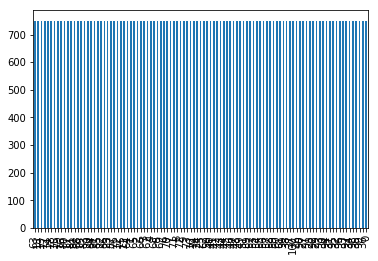

In [13]:
df['category'].value_counts().plot.bar()

Here, we see that the dataset is evenly distributed with equal number of images from each class

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

In [15]:
train_df = train_df.reset_index(drop=True)
(train_df['category'].astype('str'))
type(train_df['category'][0])

numpy.int64

In [16]:
train_df.category = train_df.category.astype(str)

In [17]:
df_test.category = df_test.category.astype(str)

In [18]:
validate_df = validate_df.reset_index(drop=True)
validate_df.category = validate_df.category.astype(str)

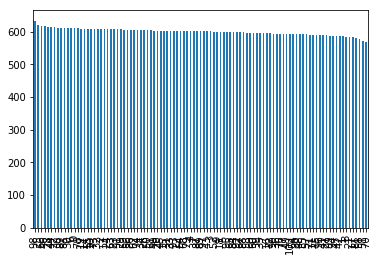

In [19]:
train_df['category'].value_counts().plot.bar()

In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15
num_classes = 101

## Creating training set data generators
the generators help with preventing overfittig by creating more sets of images during training. The images include rotated images, rescaled, zoomed, shear transfomred, flipped and shifted

In [50]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

The data is generated with the edited images along with resizing according to the CNN requirements (300X300X3)

In [51]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/media/sarvagya/Datasets/food-101/food-101/train/", 
    x_col='filename',
    y_col='category',
    target_size=(HEIGHT,WIDTH),
    batch_size=batch_size
)

Found 60600 images belonging to 101 classes.


In [52]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/media/sarvagya/Datasets/food-101/food-101/test/", 
    x_col='filename',
    y_col='category',
    target_size=(HEIGHT,WIDTH),
    batch_size=batch_size
)

Found 15150 images belonging to 101 classes.


## Base Model

In [53]:
i=0
for layer in base_model.layers:
    layer.trainable = False
    i = i+1
    print(i,layer.name)

1 input_2
2 conv1_pad
3 conv1
4 bn_conv1
5 activation_50
6 pool1_pad
7 max_pooling2d_2
8 res2a_branch2a
9 bn2a_branch2a
10 activation_51
11 res2a_branch2b
12 bn2a_branch2b
13 activation_52
14 res2a_branch2c
15 res2a_branch1
16 bn2a_branch2c
17 bn2a_branch1
18 add_17
19 activation_53
20 res2b_branch2a
21 bn2b_branch2a
22 activation_54
23 res2b_branch2b
24 bn2b_branch2b
25 activation_55
26 res2b_branch2c
27 bn2b_branch2c
28 add_18
29 activation_56
30 res2c_branch2a
31 bn2c_branch2a
32 activation_57
33 res2c_branch2b
34 bn2c_branch2b
35 activation_58
36 res2c_branch2c
37 bn2c_branch2c
38 add_19
39 activation_59
40 res3a_branch2a
41 bn3a_branch2a
42 activation_60
43 res3a_branch2b
44 bn3a_branch2b
45 activation_61
46 res3a_branch2c
47 res3a_branch1
48 bn3a_branch2c
49 bn3a_branch1
50 add_20
51 activation_62
52 res3b_branch2a
53 bn3b_branch2a
54 activation_63
55 res3b_branch2b
56 bn3b_branch2b
57 activation_64
58 res3b_branch2c
59 bn3b_branch2c
60 add_21
61 activation_65
62 res3c_branch2a
6

# Creating final layer for training
I tried two methods for training: a) Fully connected layer and b) Convolution layer.

The results with fully connectes were extremely inconsistant. The training accuracy did reach about 70% but validation accuracy didn't even touch 1%. I also tried various optimizers. 

In [61]:
x = base_model.output
x = Conv2D(128, 1, 1, activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
# predictions = Dense(num_classes, activation='softmax')(x)
# x = base_model.output
# x = AveragePooling2D(pool_size=(8, 8))(x)
# x = Dropout(.4)(x)
# x = Flatten()(x)
predictions = Dense(num_classes, init='glorot_uniform', W_regularizer=l2(.0005), activation='softmax')(x)

/home/sarvagya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), activation="relu")`
  
/home/sarvagya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(101, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


In [62]:
model = Model(inputs=base_model.input, outputs=predictions)

In [63]:
model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.01, momentum=0.9),metrics=["accuracy"])

# Scheduling learning rate according to epochs

Change the learning rate as we proceed. As the model gets trained, sometimes it's better to reduce the learning rate and it did help in improving the accuracy.

In [64]:
def schedule(epoch):
    if epoch < 10:
        return .00008
    elif epoch < 20:
        return .000016
    else:
        return .0000032
    
lr_scheduler = LearningRateScheduler(schedule)

In [65]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=total_train//batch_size,
        epochs=32,
        validation_data = validation_generator,
        validation_steps=total_validate//batch_size,
        callbacks= [lr_scheduler]
        )

Epoch 1/32
4040/4040 [==============================] - 1311s 324ms/step - loss: 4.5869 - acc: 0.0412 - val_loss: 4.0409 - val_acc: 0.1591
Epoch 2/32
4040/4040 [==============================] - 1404s 348ms/step - loss: 3.7293 - acc: 0.1927 - val_loss: 2.8299 - val_acc: 0.3719
Epoch 3/32
4040/4040 [==============================] - 1301s 322ms/step - loss: 2.9449 - acc: 0.3283 - val_loss: 2.2311 - val_acc: 0.4830
Epoch 4/32
4040/4040 [==============================] - 1305s 323ms/step - loss: 2.4631 - acc: 0.4245 - val_loss: 1.8632 - val_acc: 0.5568
Epoch 5/32
4040/4040 [==============================] - 1305s 323ms/step - loss: 2.1625 - acc: 0.4863 - val_loss: 1.6423 - val_acc: 0.6082
Epoch 6/32
4040/4040 [==============================] - 1305s 323ms/step - loss: 1.9492 - acc: 0.5362 - val_loss: 1.5643 - val_acc: 0.6232
Epoch 7/32
4040/4040 [==============================] - 1305s 323ms/step - loss: 1.7911 - acc: 0.5710 - val_loss: 1.4299 - val_acc: 0.6556
Epoch 8/32
4040/4040 [=====

In [66]:
model.save("Food-101_ResNet_CV.h5")

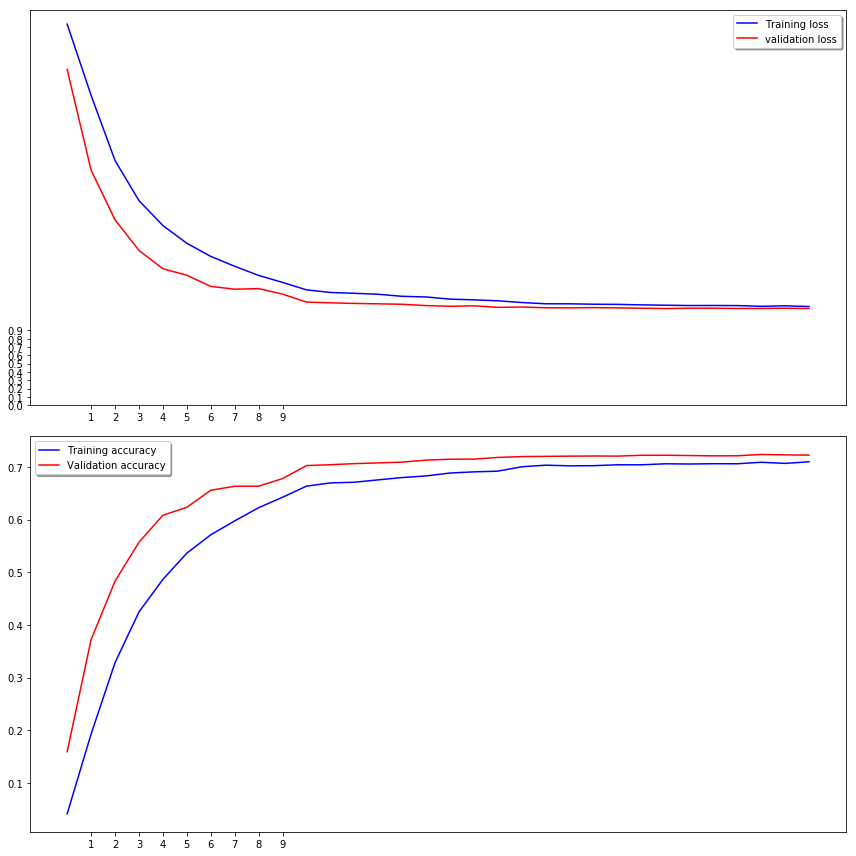

In [71]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
legend = ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [21]:
model = load_model('Food-101_ResNet_CV.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


## TESTING

In [22]:
# def center_crop(x, center_crop_size, **kwargs):
#     centerw, centerh = x.shape[0]//2, x.shape[1]//2
#     halfw, halfh = center_crop_size[0]//2, center_crop_size[1]//2
#     return x[centerw-halfw:centerw+halfw,centerh-halfh:centerh+halfh, :]

In [26]:
# def predict_10_crop(file, ix, top_n=5, plot=False, preprocess=True, debug=False):
#     y_pred = []
#     result = []
#     img = plt.imread(root_test+file)
#     flipped_X = np.fliplr(img)
#     crops = [
#         img[:300,:300, :], # Upper Left
#         img[:300, img.shape[1]-300:, :], # Upper Right
#         img[img.shape[0]-300:, :300, :], # Lower Left
#         img[img.shape[0]-300:, img.shape[1]-300:, :], # Lower Right
#         center_crop(img, (300, 300)),
        
#         flipped_X[:300,:300, :],
#         flipped_X[:300, flipped_X.shape[1]-300:, :],
#         flipped_X[flipped_X.shape[0]-300:, :300, :],
#         flipped_X[flipped_X.shape[0]-300:, flipped_X.shape[1]-300:, :],
#         center_crop(flipped_X, (300, 300))
#     ]
#     if preprocess:
#         crops = [preprocess_input(x.astype('float32')) for x in crops]

#     if plot:
#         fig, ax = plt.subplots(2, 5, figsize=(10, 4))
#         ax[0][0].imshow(crops[0])
#         ax[0][1].imshow(crops[1])
#         ax[0][2].imshow(crops[2])
#         ax[0][3].imshow(crops[3])
#         ax[0][4].imshow(crops[4])
#         ax[1][0].imshow(crops[5])
#         ax[1][1].imshow(crops[6])
#         ax[1][2].imshow(crops[7])
#         ax[1][3].imshow(crops[8])
#         ax[1][4].imshow(crops[9])
        
#     y_pred = (model.predict(np.array(crops)))
#     preds = np.argmax(y_pred, axis=1)
#     top_n_preds= np.argpartition(y_pred, -top_n)[:,-top_n:]
#     if debug:
#         print('Top-1 Predicted:', preds)
#         print('Top-5 Predicted:', top_n_preds)
#         print('True Label:', df_test['category'][ix])
#     return preds, top_n_preds

In [27]:
# ix = 8000
# predict_10_crop(df_test.loc[ix][0], ix, top_n=5, plot=True, preprocess=False, debug=True)

In [164]:
df_test['category'][ix]

'52'

In [28]:
test = df_test.sample(50)

In [29]:
test = test.reset_index(drop=True)

Testing requires a little bit of rescaling and making sure the size of the image is according to CNN's requirements

In [30]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test, 
    "/media/sarvagya/Datasets/food-101/food-101/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(300,300),
    batch_size=batch_size,
    shuffle=False
)

Found 50 images.


In [31]:
nb_samples = 50
result = []

In [32]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size), verbose=1)

4/4 [==============================] - 2s 377ms/step


In [33]:
for i in range(len(predict)):
    result.append(np.argpartition(predict[i], -5)[-5:])

In [34]:
result

[array([97, 46, 44,  2,  6]),
 array([43, 46, 30, 70, 63]),
 array([100,   2,   6,  86,  24]),
 array([70, 96, 46,  6, 44]),
 array([80, 52,  6, 19, 50]),
 array([ 97,  72,  25, 100,   8]),
 array([ 47, 100,  46,  24,  88]),
 array([67, 43, 98, 30, 27]),
 array([11, 32, 81, 94, 76]),
 array([67, 45, 49, 27, 85]),
 array([50, 10, 23, 61, 26]),
 array([ 46,  84,  35,   8, 100]),
 array([31, 14, 66, 39, 20]),
 array([87, 94, 47, 20, 32]),
 array([97, 39, 66, 69, 80]),
 array([79, 10, 72, 99, 16]),
 array([52, 77, 28, 33, 36]),
 array([32, 63, 77, 28, 60]),
 array([42, 50, 26, 61, 23]),
 array([  7, 100,  66,  40,  84]),
 array([81, 69, 88, 68, 91]),
 array([ 97, 100,  98,   2,  96]),
 array([76, 34, 89, 20, 87]),
 array([77, 59, 42, 33, 36]),
 array([30, 63, 67, 49, 27]),
 array([ 3, 31,  5, 26, 57]),
 array([43, 84, 53, 82, 89]),
 array([70, 11, 40, 84, 69]),
 array([27, 70, 63, 67, 30]),
 array([10,  2, 24, 95,  3]),
 array([81, 91, 69, 68, 92]),
 array([65, 87, 18, 48, 30]),
 array([95

In [35]:
count_top_1 = 0
count_top_5 = 0

In [36]:
for i in range(len(result)):
    if (test['category'][i]==result[i][0]):
        count_top_1+=1
    elif(test['category'][i] in result[i]):
        count_top_5+=1

/home/sarvagya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [37]:
count_top_1

0

In [38]:
count_top_5

0